In [208]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [209]:
heart_failure_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_failure_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [210]:
heart_failure_df.shape

(299, 13)

In [211]:
299*0.8

239.20000000000002

In [212]:
train_df = heart_failure_df.iloc[:239,:]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,53.0,1,582,0,45,0,305000.00,1.1,137,1,1,209,0
235,77.0,1,109,0,50,1,406000.00,1.1,137,1,0,209,0
236,75.0,0,119,0,50,1,248000.00,1.1,148,1,0,209,0
237,70.0,0,232,0,30,0,173000.00,1.2,132,1,0,210,0


In [213]:
test_df = heart_failure_df.iloc[240:,:].reset_index().drop(["index"],axis=1)
test_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,70.0,0,81,1,35,1,533000.00,1.30,139,0,0,212,0
1,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
2,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212,0
3,73.0,1,1185,0,40,1,220000.00,0.90,141,0,0,213,0
4,54.0,0,582,1,38,0,264000.00,1.80,134,1,0,213,0
5,61.0,1,80,1,38,0,282000.00,1.40,137,1,0,213,0
6,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
7,64.0,0,143,0,25,0,246000.00,2.40,135,1,0,214,0
8,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
9,53.0,0,207,1,40,0,223000.00,1.20,130,0,0,214,0


In [214]:
combine = [train_df,test_df]
combine

[      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0    75.0        0                       582         0                 20   
 1    55.0        0                      7861         0                 38   
 2    65.0        0                       146         0                 20   
 3    50.0        1                       111         0                 20   
 4    65.0        1                       160         1                 20   
 ..    ...      ...                       ...       ...                ...   
 234  53.0        1                       582         0                 45   
 235  77.0        1                       109         0                 50   
 236  75.0        0                       119         0                 50   
 237  70.0        0                       232         0                 30   
 238  65.0        1                       720         1                 40   
 
      high_blood_pressure  platelets  serum_creatinine  serum_

In [215]:
train_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [216]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   diabetes                  239 non-null    int64  
 4   ejection_fraction         239 non-null    int64  
 5   high_blood_pressure       239 non-null    int64  
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    int64  
 9   sex                       239 non-null    int64  
 10  smoking                   239 non-null    int64  
 11  time                      239 non-null    int64  
 12  DEATH_EVENT               239 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 24.4 KB


In [217]:
train_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [218]:
train_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,61.959556,0.468619,582.974895,0.393305,38.142259,0.393305,261371.558870,1.442929,136.456067,0.652720,0.326360,103.054393,0.389121
std,12.060799,0.500062,1035.050175,0.489509,12.605715,0.489509,93419.597624,1.122816,4.564794,0.477105,0.469865,61.174509,0.488574
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,47000.000000,0.600000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,52.000000,0.000000,115.000000,0.000000,30.000000,0.000000,210500.000000,0.900000,134.000000,0.000000,0.000000,59.500000,0.000000
50%,60.000000,0.000000,235.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,95.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.500000,139.000000,1.000000,1.000000,147.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,210.000000,1.000000


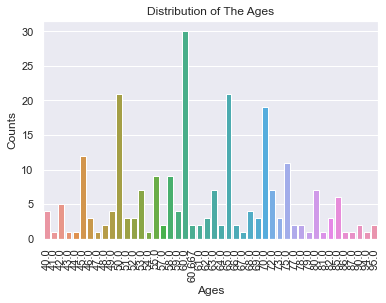

In [219]:
age = train_df["age"].value_counts()
sns.set(style="darkgrid")
sns.barplot(age.index, age.values)
plt.title("Distribution of The Ages")
plt.xlabel("Ages")
plt.xticks(rotation = 90)
plt.ylabel("Counts")
plt.show()

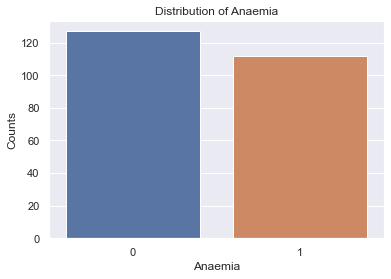

In [220]:
anemia = train_df["anaemia"].value_counts()
sns.set(style="darkgrid")
sns.barplot(anemia.index, anemia.values)
plt.title("Distribution of Anaemia")
plt.xlabel("Anaemia")
plt.ylabel("Counts")
plt.show()

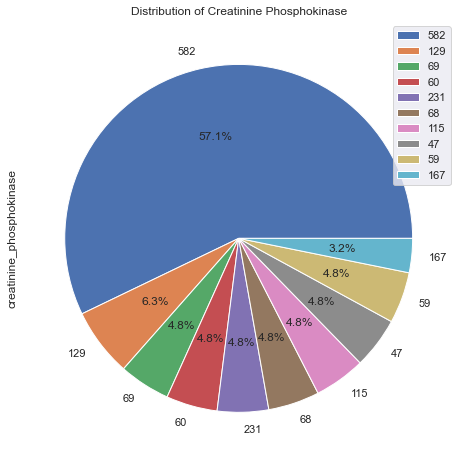

In [221]:
train_df["creatinine_phosphokinase"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Creatinine Phosphokinase")
plt.show()

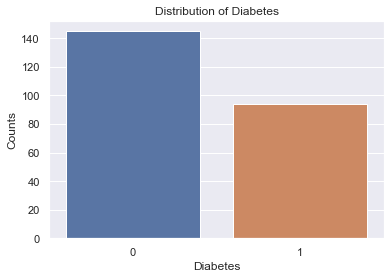

In [222]:
diabetes = train_df["diabetes"].value_counts()
sns.set(style="darkgrid")
sns.barplot(diabetes.index, diabetes.values)
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Counts")
plt.show()

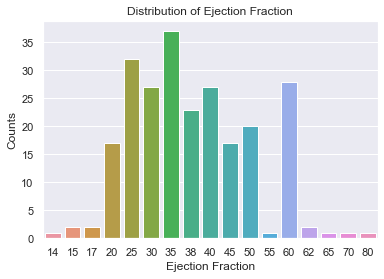

In [223]:
ejection = train_df["ejection_fraction"].value_counts()
sns.set(style="darkgrid")
sns.barplot(ejection.index, ejection.values)
plt.title("Distribution of Ejection Fraction")
plt.xlabel("Ejection Fraction")
plt.ylabel("Counts")
plt.show()

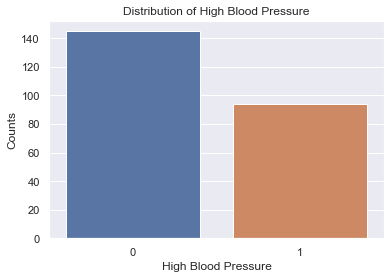

In [224]:
high_blood_pressure = train_df["high_blood_pressure"].value_counts()
sns.set(style="darkgrid")
sns.barplot(high_blood_pressure.index, high_blood_pressure.values)
plt.title("Distribution of High Blood Pressure")
plt.xlabel("High Blood Pressure")
plt.ylabel("Counts")
plt.show()

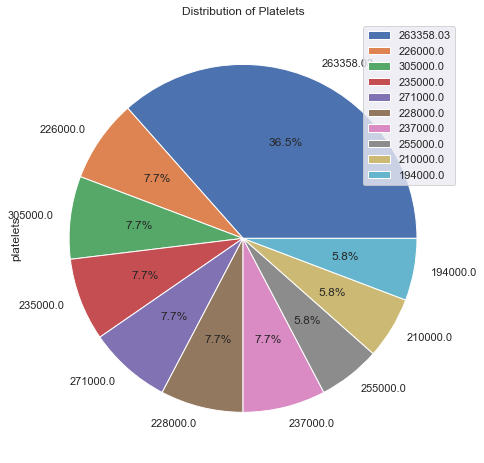

In [225]:
train_df["platelets"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Platelets")
plt.show()

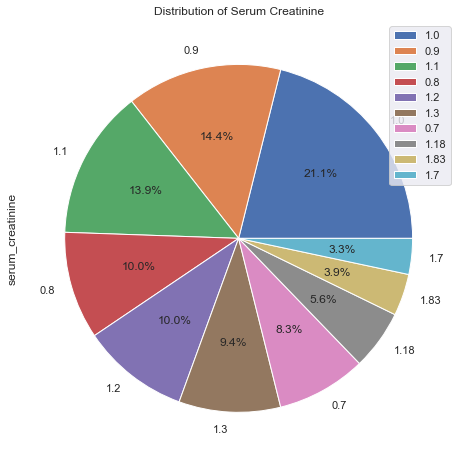

In [226]:
train_df["serum_creatinine"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Serum Creatinine")
plt.show()

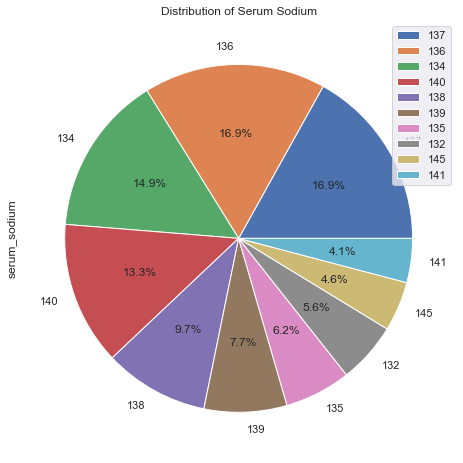

In [227]:
train_df["serum_sodium"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Serum Sodium")
plt.show()

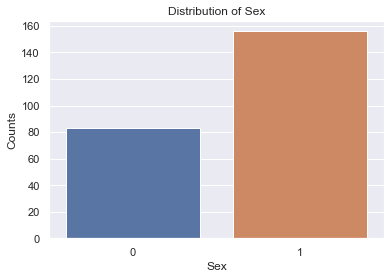

In [228]:
sex = train_df["sex"].value_counts()
sns.set(style="darkgrid")
sns.barplot(sex.index, sex.values)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.show()

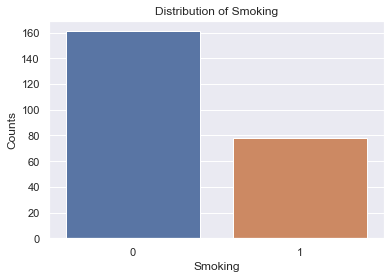

In [229]:
smoking = train_df["smoking"].value_counts()
sns.set(style="darkgrid")
sns.barplot(smoking.index, smoking.values)
plt.title("Distribution of Smoking")
plt.xlabel("Smoking")
plt.ylabel("Counts")
plt.show()

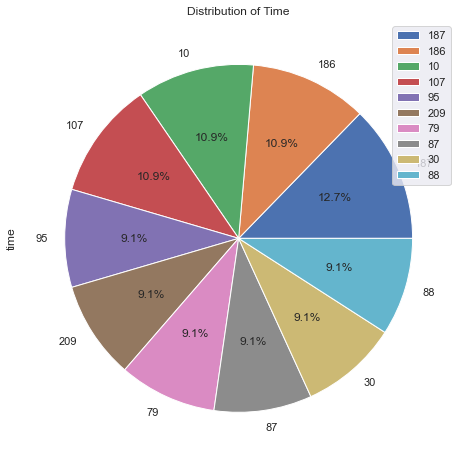

In [230]:
train_df["time"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Time")
plt.show()

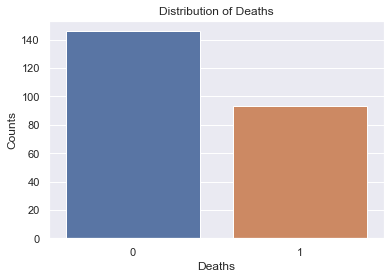

In [231]:
death = train_df["DEATH_EVENT"].value_counts()
sns.set(style="darkgrid")
sns.barplot(death.index, death.values)
plt.title("Distribution of Deaths")
plt.xlabel("Deaths")
plt.ylabel("Counts")
plt.show()

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

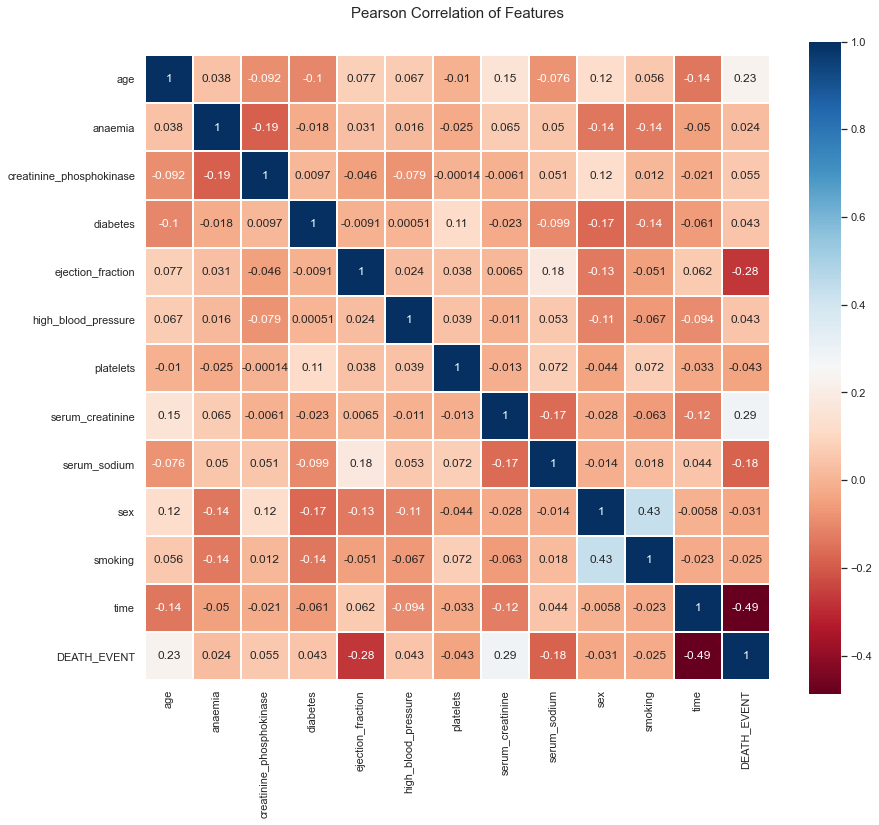

In [232]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [233]:
train_df[["age","DEATH_EVENT"]].groupby(["age"], as_index=False).mean().sort_values(by="age", ascending=False)

,age,DEATH_EVENT
45,95.000,1.000000
44,94.000,1.000000
43,90.000,1.000000
42,87.000,1.000000
41,86.000,1.000000
40,85.000,0.500000
39,82.000,1.000000
38,81.000,0.000000
37,80.000,0.714286
36,79.000,0.000000


In [234]:
train_df[["ejection_fraction","DEATH_EVENT"]].groupby(["ejection_fraction"], as_index=False).mean().sort_values(by="ejection_fraction", ascending=False)

,ejection_fraction,DEATH_EVENT
16,80,0.000000
15,70,1.000000
14,65,1.000000
13,62,0.500000
12,60,0.142857
11,55,1.000000
10,50,0.300000
9,45,0.294118
8,40,0.148148
7,38,0.652174


In [235]:
train_df[["serum_creatinine","DEATH_EVENT"]].groupby(["serum_creatinine"], as_index=False).mean().sort_values(by="serum_creatinine", ascending=False)

,serum_creatinine,DEATH_EVENT
37,9.40,1.000000
36,9.00,1.000000
35,6.80,1.000000
34,6.10,0.000000
33,5.80,1.000000
32,5.00,0.000000
31,4.40,1.000000
30,4.00,1.000000
29,3.70,1.000000
28,3.50,0.500000


In [236]:
train_df[["serum_sodium","DEATH_EVENT"]].groupby(["serum_sodium"], as_index=False).mean().sort_values(by="serum_sodium", ascending=False)

,serum_sodium,DEATH_EVENT
26,148,0.000000
25,146,1.000000
24,145,0.333333
23,144,0.500000
22,143,0.000000
21,142,0.571429
20,141,0.125000
19,140,0.269231
18,139,0.400000
17,138,0.263158


In [237]:
train_df[["time","DEATH_EVENT"]].groupby(["time"], as_index=False).mean().sort_values(by="time", ascending=False)

,time,DEATH_EVENT
120,210,0.000000
119,209,0.000000
118,208,0.000000
117,207,0.333333
116,206,0.000000
...,...,...
4,10,1.000000
3,8,1.000000
2,7,1.000000
1,6,1.000000


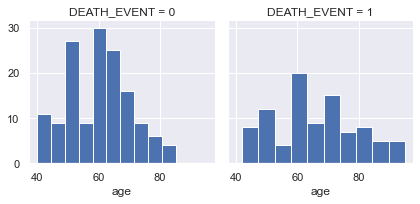

In [238]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "age")

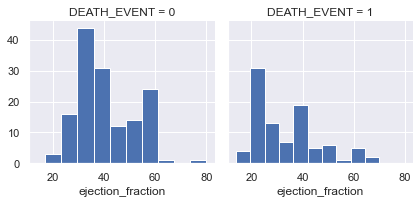

In [239]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "ejection_fraction")

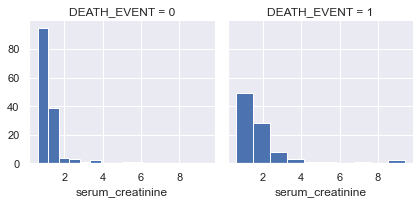

In [240]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "serum_creatinine")

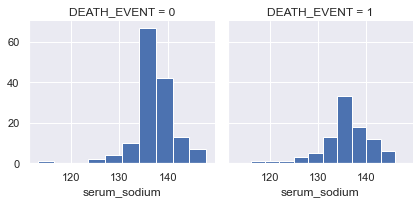

In [241]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "serum_sodium")

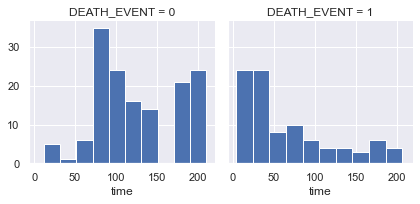

In [242]:
g = sns.FacetGrid(train_df, col="DEATH_EVENT")
g.map(plt.hist, "time")

In [243]:
train_df["AgeRange"] = pd.cut(train_df["age"], 6)
train_df[["AgeRange", "DEATH_EVENT"]].groupby(["AgeRange"], as_index=False).mean().sort_values(by="AgeRange", ascending=True)

,AgeRange,DEATH_EVENT
0,"(39.945, 49.167]",0.323529
1,"(49.167, 58.333]",0.272727
2,"(58.333, 67.5]",0.337838
3,"(67.5, 76.667]",0.489362
4,"(76.667, 85.833]",0.545455
5,"(85.833, 95.0]",1.000000


In [244]:
for dataset in combine:
    dataset.loc[dataset["age"] <= 49, "age"] = 0
    dataset.loc[(dataset["age"] > 49) & (dataset["age"] <= 58), "age"] =  1
    dataset.loc[(dataset["age"] > 58) & (dataset["age"] <= 68), "age"] =  2
    dataset.loc[(dataset["age"] > 68) & (dataset["age"] <= 77), "age"] =  3
    dataset.loc[(dataset["age"] > 77) & (dataset["age"] <= 86), "age"] =  4
    dataset.loc[dataset["age"] > 86, "age"] =  5
    dataset["age"] = dataset["age"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,AgeRange
0,3,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"(67.5, 76.667]"
1,1,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,"(49.167, 58.333]"
2,2,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,"(58.333, 67.5]"
3,1,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,"(49.167, 58.333]"
4,2,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,"(58.333, 67.5]"


In [245]:
train_df = train_df.drop(["AgeRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,1,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,2,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,1,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,2,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,1,582,0,45,0,305000.00,1.1,137,1,1,209,0
235,3,1,109,0,50,1,406000.00,1.1,137,1,0,209,0
236,3,0,119,0,50,1,248000.00,1.1,148,1,0,209,0
237,3,0,232,0,30,0,173000.00,1.2,132,1,0,210,0


In [246]:
train_df["CreatinineRange"] = pd.cut(train_df["creatinine_phosphokinase"], 6)
train_df[["CreatinineRange", "DEATH_EVENT"]].groupby(["CreatinineRange"], as_index=False).mean().sort_values(by="CreatinineRange", ascending=True)

,CreatinineRange,DEATH_EVENT
0,"(15.162, 1329.333]",0.391705
1,"(1329.333, 2635.667]",0.307692
2,"(2635.667, 3942.0]",0.000000
3,"(3942.0, 5248.333]",0.250000
4,"(5248.333, 6554.667]",1.000000
5,"(6554.667, 7861.0]",1.000000


In [247]:
for dataset in combine:
    dataset.loc[dataset["creatinine_phosphokinase"] <= 1329, "creatinine_phosphokinase"] = 0
    dataset.loc[(dataset["creatinine_phosphokinase"] > 1329) & (dataset["creatinine_phosphokinase"] <= 2636), "creatinine_phosphokinase"] =  1
    dataset.loc[(dataset["creatinine_phosphokinase"] > 2636) & (dataset["creatinine_phosphokinase"] <= 3942), "creatinine_phosphokinase"] =  2
    dataset.loc[(dataset["creatinine_phosphokinase"] > 3942) & (dataset["creatinine_phosphokinase"] <= 5248), "creatinine_phosphokinase"] =  3
    dataset.loc[(dataset["creatinine_phosphokinase"] > 5248) & (dataset["creatinine_phosphokinase"] <= 6555), "creatinine_phosphokinase"] =  4
    dataset.loc[dataset["creatinine_phosphokinase"] > 6555, "creatinine_phosphokinase"] =  5
    dataset["creatinine_phosphokinase"] = dataset["creatinine_phosphokinase"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,CreatinineRange
0,3,0,0,0,20,1,265000.00,1.9,130,1,0,4,1,"(15.162, 1329.333]"
1,1,0,5,0,38,0,263358.03,1.1,136,1,0,6,1,"(6554.667, 7861.0]"
2,2,0,0,0,20,0,162000.00,1.3,129,1,1,7,1,"(15.162, 1329.333]"
3,1,1,0,0,20,0,210000.00,1.9,137,1,0,7,1,"(15.162, 1329.333]"
4,2,1,0,1,20,0,327000.00,2.7,116,0,0,8,1,"(15.162, 1329.333]"


In [248]:
train_df = train_df.drop(["CreatinineRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,0,0,20,1,265000.00,1.9,130,1,0,4,1
1,1,0,5,0,38,0,263358.03,1.1,136,1,0,6,1
2,2,0,0,0,20,0,162000.00,1.3,129,1,1,7,1
3,1,1,0,0,20,0,210000.00,1.9,137,1,0,7,1
4,2,1,0,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,1,0,0,45,0,305000.00,1.1,137,1,1,209,0
235,3,1,0,0,50,1,406000.00,1.1,137,1,0,209,0
236,3,0,0,0,50,1,248000.00,1.1,148,1,0,209,0
237,3,0,0,0,30,0,173000.00,1.2,132,1,0,210,0


In [249]:
train_df["EjectionRange"] = pd.cut(train_df["ejection_fraction"], 6)
train_df[["EjectionRange", "DEATH_EVENT"]].groupby(["EjectionRange"], as_index=False).mean().sort_values(by="EjectionRange", ascending=True)

,EjectionRange,DEATH_EVENT
0,"(13.934, 25.0]",0.648148
1,"(25.0, 36.0]",0.312500
2,"(36.0, 47.0]",0.358209
3,"(47.0, 58.0]",0.333333
4,"(58.0, 69.0]",0.193548
5,"(69.0, 80.0]",0.500000


In [250]:
for dataset in combine:
    dataset.loc[dataset["ejection_fraction"] <= 25, "ejection_fraction"] = 0
    dataset.loc[(dataset["ejection_fraction"] > 25) & (dataset["ejection_fraction"] <= 36), "ejection_fraction"] =  1
    dataset.loc[(dataset["ejection_fraction"] > 36) & (dataset["ejection_fraction"] <= 47), "ejection_fraction"] =  2
    dataset.loc[(dataset["ejection_fraction"] > 47) & (dataset["ejection_fraction"] <= 58), "ejection_fraction"] =  3
    dataset.loc[(dataset["ejection_fraction"] > 58) & (dataset["ejection_fraction"] <= 69), "ejection_fraction"] =  4
    dataset.loc[dataset["ejection_fraction"] > 69, "ejection_fraction"] =  5
    dataset["ejection_fraction"] = dataset["ejection_fraction"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,EjectionRange
0,3,0,0,0,0,1,265000.00,1.9,130,1,0,4,1,"(13.934, 25.0]"
1,1,0,5,0,2,0,263358.03,1.1,136,1,0,6,1,"(36.0, 47.0]"
2,2,0,0,0,0,0,162000.00,1.3,129,1,1,7,1,"(13.934, 25.0]"
3,1,1,0,0,0,0,210000.00,1.9,137,1,0,7,1,"(13.934, 25.0]"
4,2,1,0,1,0,0,327000.00,2.7,116,0,0,8,1,"(13.934, 25.0]"


In [251]:
train_df = train_df.drop(["EjectionRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,0,0,0,1,265000.00,1.9,130,1,0,4,1
1,1,0,5,0,2,0,263358.03,1.1,136,1,0,6,1
2,2,0,0,0,0,0,162000.00,1.3,129,1,1,7,1
3,1,1,0,0,0,0,210000.00,1.9,137,1,0,7,1
4,2,1,0,1,0,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,1,0,0,2,0,305000.00,1.1,137,1,1,209,0
235,3,1,0,0,3,1,406000.00,1.1,137,1,0,209,0
236,3,0,0,0,3,1,248000.00,1.1,148,1,0,209,0
237,3,0,0,0,1,0,173000.00,1.2,132,1,0,210,0


In [252]:
train_df["PlateletsRange"] = pd.cut(train_df["platelets"], 6)
train_df[["PlateletsRange", "DEATH_EVENT"]].groupby(["PlateletsRange"], as_index=False).mean().sort_values(by="PlateletsRange", ascending=True)

,PlateletsRange,DEATH_EVENT
0,"(46197.0, 180833.333]",0.486486
1,"(180833.333, 314666.667]",0.344371
2,"(314666.667, 448500.0]",0.428571
3,"(448500.0, 582333.333]",0.571429
4,"(582333.333, 716166.667]",1.000000
5,"(716166.667, 850000.0]",0.000000


In [253]:
for dataset in combine:
    dataset.loc[dataset["platelets"] <= 180833, "platelets"] = 0
    dataset.loc[(dataset["platelets"] > 180833) & (dataset["platelets"] <= 314667), "platelets"] =  1
    dataset.loc[(dataset["platelets"] > 314667) & (dataset["platelets"] <= 448500), "platelets"] =  2
    dataset.loc[(dataset["platelets"] > 448500) & (dataset["platelets"] <= 582333), "platelets"] =  3
    dataset.loc[(dataset["platelets"] > 582333) & (dataset["platelets"] <= 716167), "platelets"] =  4
    dataset.loc[dataset["platelets"] > 716167, "platelets"] =  5
    dataset["platelets"] = dataset["platelets"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,PlateletsRange
0,3,0,0,0,0,1,1,1.9,130,1,0,4,1,"(180833.333, 314666.667]"
1,1,0,5,0,2,0,1,1.1,136,1,0,6,1,"(180833.333, 314666.667]"
2,2,0,0,0,0,0,0,1.3,129,1,1,7,1,"(46197.0, 180833.333]"
3,1,1,0,0,0,0,1,1.9,137,1,0,7,1,"(180833.333, 314666.667]"
4,2,1,0,1,0,0,2,2.7,116,0,0,8,1,"(314666.667, 448500.0]"


In [254]:
train_df = train_df.drop(["PlateletsRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,0,0,0,1,1,1.9,130,1,0,4,1
1,1,0,5,0,2,0,1,1.1,136,1,0,6,1
2,2,0,0,0,0,0,0,1.3,129,1,1,7,1
3,1,1,0,0,0,0,1,1.9,137,1,0,7,1
4,2,1,0,1,0,0,2,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,1,0,0,2,0,1,1.1,137,1,1,209,0
235,3,1,0,0,3,1,2,1.1,137,1,0,209,0
236,3,0,0,0,3,1,1,1.1,148,1,0,209,0
237,3,0,0,0,1,0,0,1.2,132,1,0,210,0


In [255]:
train_df["SerumCRange"] = pd.cut(train_df["serum_creatinine"], 6)
train_df[["SerumCRange", "DEATH_EVENT"]].groupby(["SerumCRange"], as_index=False).mean().sort_values(by="SerumCRange", ascending=True)

,SerumCRange,DEATH_EVENT
0,"(0.591, 2.067]",0.346154
1,"(2.067, 3.533]",0.636364
2,"(3.533, 5.0]",0.750000
3,"(5.0, 6.467]",0.500000
4,"(6.467, 7.933]",1.000000
5,"(7.933, 9.4]",1.000000


In [256]:
for dataset in combine:
    dataset.loc[dataset["serum_creatinine"] <= 2, "serum_creatinine"] = 0
    dataset.loc[(dataset["serum_creatinine"] > 2) & (dataset["serum_creatinine"] <= 4), "serum_creatinine"] =  1
    dataset.loc[(dataset["serum_creatinine"] > 4) & (dataset["serum_creatinine"] <= 5), "serum_creatinine"] =  2
    dataset.loc[(dataset["serum_creatinine"] > 5) & (dataset["serum_creatinine"] <= 6), "serum_creatinine"] =  3
    dataset.loc[(dataset["serum_creatinine"] > 6) & (dataset["serum_creatinine"] <= 8), "serum_creatinine"] =  4
    dataset.loc[dataset["serum_creatinine"] > 8, "serum_creatinine"] =  5
    dataset["serum_creatinine"] = dataset["serum_creatinine"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,SerumCRange
0,3,0,0,0,0,1,1,0,130,1,0,4,1,"(0.591, 2.067]"
1,1,0,5,0,2,0,1,0,136,1,0,6,1,"(0.591, 2.067]"
2,2,0,0,0,0,0,0,0,129,1,1,7,1,"(0.591, 2.067]"
3,1,1,0,0,0,0,1,0,137,1,0,7,1,"(0.591, 2.067]"
4,2,1,0,1,0,0,2,1,116,0,0,8,1,"(2.067, 3.533]"


In [257]:
train_df = train_df.drop(["SerumCRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,0,0,0,1,1,0,130,1,0,4,1
1,1,0,5,0,2,0,1,0,136,1,0,6,1
2,2,0,0,0,0,0,0,0,129,1,1,7,1
3,1,1,0,0,0,0,1,0,137,1,0,7,1
4,2,1,0,1,0,0,2,1,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,1,0,0,2,0,1,0,137,1,1,209,0
235,3,1,0,0,3,1,2,0,137,1,0,209,0
236,3,0,0,0,3,1,1,0,148,1,0,209,0
237,3,0,0,0,1,0,0,0,132,1,0,210,0


In [258]:
train_df["SerumSRange"] = pd.cut(train_df["serum_sodium"], 6)
train_df[["SerumSRange", "DEATH_EVENT"]].groupby(["SerumSRange"], as_index=False).mean().sort_values(by="SerumSRange", ascending=True)

,SerumSRange,DEATH_EVENT
0,"(112.965, 118.833]",0.500000
1,"(118.833, 124.667]",1.000000
2,"(124.667, 130.5]",0.571429
3,"(130.5, 136.333]",0.474227
4,"(136.333, 142.167]",0.277778
5,"(142.167, 148.0]",0.375000


In [259]:
for dataset in combine:
    dataset.loc[dataset["serum_sodium"] <= 119, "serum_sodium"] = 0
    dataset.loc[(dataset["serum_sodium"] > 119) & (dataset["serum_sodium"] <= 125), "serum_sodium"] =  1
    dataset.loc[(dataset["serum_sodium"] > 125) & (dataset["serum_sodium"] <= 131), "serum_sodium"] =  2
    dataset.loc[(dataset["serum_sodium"] > 131) & (dataset["serum_sodium"] <= 136), "serum_sodium"] =  3
    dataset.loc[(dataset["serum_sodium"] > 136) & (dataset["serum_sodium"] <= 142), "serum_sodium"] =  4
    dataset.loc[dataset["serum_sodium"] > 142, "serum_sodium"] =  5
    dataset["serum_sodium"] = dataset["serum_sodium"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,SerumSRange
0,3,0,0,0,0,1,1,0,2,1,0,4,1,"(124.667, 130.5]"
1,1,0,5,0,2,0,1,0,3,1,0,6,1,"(130.5, 136.333]"
2,2,0,0,0,0,0,0,0,2,1,1,7,1,"(124.667, 130.5]"
3,1,1,0,0,0,0,1,0,4,1,0,7,1,"(136.333, 142.167]"
4,2,1,0,1,0,0,2,1,0,0,0,8,1,"(112.965, 118.833]"


In [260]:
train_df = train_df.drop(["SerumSRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,0,0,0,1,1,0,2,1,0,4,1
1,1,0,5,0,2,0,1,0,3,1,0,6,1
2,2,0,0,0,0,0,0,0,2,1,1,7,1
3,1,1,0,0,0,0,1,0,4,1,0,7,1
4,2,1,0,1,0,0,2,1,0,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,1,0,0,2,0,1,0,4,1,1,209,0
235,3,1,0,0,3,1,2,0,4,1,0,209,0
236,3,0,0,0,3,1,1,0,5,1,0,209,0
237,3,0,0,0,1,0,0,0,3,1,0,210,0


In [261]:
train_df["TimeRange"] = pd.cut(train_df["time"], 6)
train_df[["TimeRange", "DEATH_EVENT"]].groupby(["TimeRange"], as_index=False).mean().sort_values(by="TimeRange", ascending=True)

,TimeRange,DEATH_EVENT
0,"(3.794, 38.333]",0.872340
1,"(38.333, 72.667]",0.740741
2,"(72.667, 107.0]",0.174603
3,"(107.0, 141.333]",0.250000
4,"(141.333, 175.667]",0.291667
5,"(175.667, 210.0]",0.130435


In [262]:
for dataset in combine:
    dataset.loc[dataset["time"] <= 38, "time"] = 0
    dataset.loc[(dataset["time"] > 38) & (dataset["time"] <= 73), "time"] =  1
    dataset.loc[(dataset["time"] > 73) & (dataset["time"] <= 107), "time"] =  2
    dataset.loc[(dataset["time"] > 107) & (dataset["time"] <= 141), "time"] =  3
    dataset.loc[(dataset["time"] > 141) & (dataset["time"] <= 175), "time"] =  4
    dataset.loc[dataset["time"] > 175, "time"] =  5
    dataset["time"] = dataset["time"].astype(int)

train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,TimeRange
0,3,0,0,0,0,1,1,0,2,1,0,0,1,"(3.794, 38.333]"
1,1,0,5,0,2,0,1,0,3,1,0,0,1,"(3.794, 38.333]"
2,2,0,0,0,0,0,0,0,2,1,1,0,1,"(3.794, 38.333]"
3,1,1,0,0,0,0,1,0,4,1,0,0,1,"(3.794, 38.333]"
4,2,1,0,1,0,0,2,1,0,0,0,0,1,"(3.794, 38.333]"


In [263]:
train_df = train_df.drop(["TimeRange"], axis=1)
combine = [train_df, test_df]
train_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,0,0,0,1,1,0,2,1,0,0,1
1,1,0,5,0,2,0,1,0,3,1,0,0,1
2,2,0,0,0,0,0,0,0,2,1,1,0,1
3,1,1,0,0,0,0,1,0,4,1,0,0,1
4,2,1,0,1,0,0,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,1,0,0,2,0,1,0,4,1,1,5,0
235,3,1,0,0,3,1,2,0,4,1,0,5,0
236,3,0,0,0,3,1,1,0,5,1,0,5,0
237,3,0,0,0,1,0,0,0,3,1,0,5,0


In [264]:
train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,0,0,0,1,1,0,2,1,0,0,1
1,1,0,5,0,2,0,1,0,3,1,0,0,1
2,2,0,0,0,0,0,0,0,2,1,1,0,1
3,1,1,0,0,0,0,1,0,4,1,0,0,1
4,2,1,0,1,0,0,2,1,0,0,0,0,1


In [288]:
test_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,3,0,0,1,1,1,3,0,4,0,0,5,0
1,2,0,0,1,1,0,1,0,3,1,1,5,0
2,0,0,0,0,1,0,1,0,3,1,1,5,0
3,3,1,0,0,2,1,1,0,4,0,0,5,0
4,1,0,0,1,2,0,1,0,3,1,0,5,0


In [269]:
X_train = train_df.drop(["DEATH_EVENT"], axis=1)
Y_train = train_df["DEATH_EVENT"]
X_test = test_df.drop(["DEATH_EVENT"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((239, 12), (239,), (59, 12))

In [270]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Accuracy for logistic regression : {}".format(acc_log))

Accuracy for logistic regression : 82.01


In [273]:
coeff_df = pd.DataFrame(train_df.columns.delete(12))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,serum_creatinine,0.625857
0,age,0.437277
2,creatinine_phosphokinase,0.146201
6,platelets,0.082152
1,anaemia,0.007743
5,high_blood_pressure,-0.046125
3,diabetes,-0.078350
10,smoking,-0.179745
9,sex,-0.451179
8,serum_sodium,-0.477914


In [274]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("Accuracy for Support Vector Machines : {}".format(acc_svc))

Accuracy for Support Vector Machines : 84.52


In [275]:
# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("Accuracy for KNN : {}".format(acc_knn))

Accuracy for KNN : 84.52


In [276]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("Accuracy for Gaussian NB : {}".format(acc_gaussian))

Accuracy for Gaussian NB : 74.9


In [277]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print("Accuracy for Perceptron : {}".format(acc_perceptron))

Accuracy for Perceptron : 72.38


In [278]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print("Accuracy for Linear SVC : {}".format(acc_linear_svc))

Accuracy for Linear SVC : 82.01


In [279]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print("Accuracy for SGD : {}".format(acc_sgd))

Accuracy for SGD : 49.79


In [280]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy for Decision Tree : {}".format(acc_decision_tree))

Accuracy for Decision Tree : 100.0


In [286]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy for Random Forest : {}".format(acc_decision_tree))

Accuracy for Random Forest : 100.0


In [282]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,84.52
1,KNN,84.52
2,Logistic Regression,82.01
7,Linear SVC,82.01
4,Naive Bayes,74.90
5,Perceptron,72.38
6,Stochastic Gradient Decent,49.79


In [283]:
submission = pd.DataFrame({"Death": Y_pred})

In [284]:
submission

,Death
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [289]:
submission.to_csv("submission.csv", index=False)